In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [156]:
data=pd.read_csv('http://www.csc.kth.se/utbildning/kth/kurser/DD1320/tilda12/forel/London2012.csv')
data=data.iloc[:,1:4]
data.head()

,Sex,Sport name,Country name
0,M,Judo,China
1,M,Athletics,France
2,M,Boxing,Morocco
3,F,Athletics,Russia
4,M,Handball,France


In [157]:
data.columns=['Gender','Sports','Country']
data.head()

,Gender,Sports,Country
0,M,Judo,China
1,M,Athletics,France
2,M,Boxing,Morocco
3,F,Athletics,Russia
4,M,Handball,France


In [158]:
nepaldata=data.where(data['Country'].str.contains('Nepal',na=True)).dropna()

In [159]:
nonnepaldata=data.where(~data['Country'].str.contains('Nepal',na=True)).dropna()

In [160]:
nepalsports=nepaldata['Sports'].unique()
nepalsports

array(['Swimming', 'Shooting', 'Athletics'], dtype=object)

In [161]:
nepalsportsinnonnepalcountry= nonnepaldata[nonnepaldata['Sports'].isin(nepalsports)]

In [162]:
grp1=nepalsportsinnonnepalcountry.groupby(['Sports','Gender']).count()
grp2=nepalsportsinnonnepalcountry.groupby(['Sports']).count()
grp1

Country
Sports    Gender         
Athletics F          1070
          M          1161
Shooting  F           158
          M           231
Swimming  F           446
          M           494

In [163]:
grp2

,Gender,Country
Sports,,
Athletics,2231,2231
Shooting,389,389
Swimming,940,940


In [164]:
nonNepalDist=grp1.div(grp2,level=0) ['Country']
nonNepalDist

Sports     Gender
Athletics  F         0.479606
           M         0.520394
Shooting   F         0.406170
           M         0.593830
Swimming   F         0.474468
           M         0.525532
Name: Country, dtype: float64

In [165]:
grp1=nepaldata.groupby(['Sports','Gender']).count()
grp2=nepaldata.groupby(['Sports']).count()
NepalDist=grp1.div(grp2,level=0) ['Country']
NepalDist

Sports     Gender
Athletics  F         0.5
           M         0.5
Shooting   F         1.0
Swimming   F         0.5
           M         0.5
Name: Country, dtype: float64

<IPython.core.display.Javascript object>


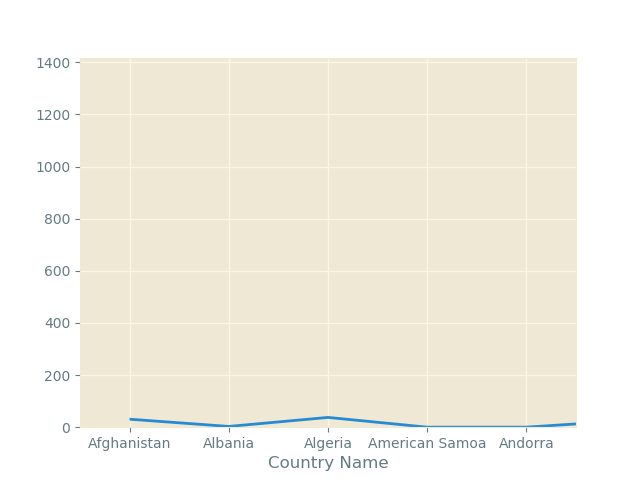

In [166]:
nonNepalDist.plot(kind='bar')
NepalDist.plot(kind='bar',color='red')

In [167]:
population =pd.read_csv('https://pkgstore.datahub.io/core/population/population_csv/data/ead5be05591360d33ad1a37382f8f8b1/population_csv.csv')
population.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0


In [168]:
population2012=population[population['Year']==2012]
population2012.index=population2012['Country Name']

In [169]:
population2012=population2012['Value']
population2012.head()

Country Name
Arab World                        3.733070e+08
Caribbean small states            7.074129e+06
Central Europe and the Baltics    1.039353e+08
Early-demographic dividend        2.996573e+09
East Asia & Pacific               2.235430e+09
Name: Value, dtype: float64

In [170]:
population2012Million=population2012/1000000

In [171]:
population2012Million

Country Name
Arab World                                               373.306993
Caribbean small states                                     7.074129
Central Europe and the Baltics                           103.935318
Early-demographic dividend                              2996.573424
East Asia & Pacific                                     2235.430359
East Asia & Pacific (excluding high income)             1993.008684
East Asia & Pacific (IDA & IBRD countries)              1968.120178
Euro area                                                336.167296
Europe & Central Asia                                    894.666669
Europe & Central Asia (excluding high income)            407.706585
Europe & Central Asia (IDA & IBRD countries)             445.769749
European Union                                           505.104334
Fragile and conflict affected situations                 460.228236
Heavily indebted poor countries (HIPC)                   666.488623
High income                        

In [172]:
population2012Million[population2012Million.index.isin(data['Country'].unique())].plot()

In [173]:
popNepal=population2012Million['Nepal']


<IPython.core.display.Javascript object>


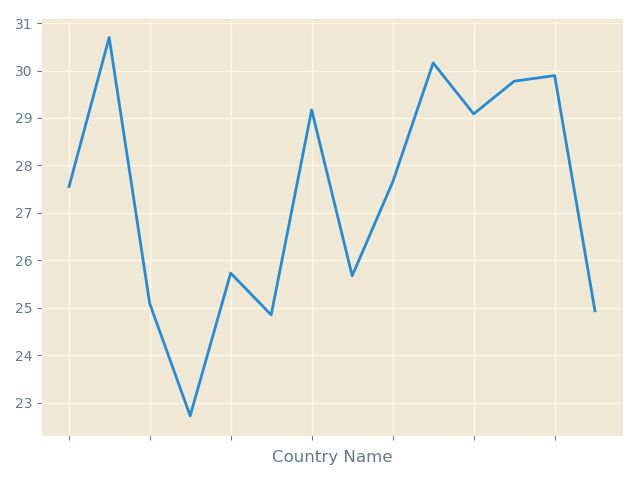

In [174]:
plt.figure()
population2012Million.where((population2012Million>=popNepal -5) & (population2012Million<=popNepal +5)).dropna().plot()


In [175]:
nepaldata=data.where(data['Country'].str.contains('Nepal',na=True)).dropna()
similarpopulation=population2012Million.where((population2012Million>=popNepal -5) & (population2012Million<=popNepal +5)).dropna()


In [176]:
similarpopulation
sportinsimilarpopulation=data[data['Country'].isin(similarpopulation.index)]
sportinsimilarpopulation.head()

,Gender,Sports,Country
20,M,Athletics,Australia
25,M,Wrestling,Uzbekistan
76,M,Athletics,Australia
171,M,Equestrian,Saudi Arabia
176,M,Equestrian,Saudi Arabia


In [177]:
summary=sportinsimilarpopulation.groupby(['Country','Gender']).count()
summary

Sports
Country      Gender        
Afghanistan  F            1
             M            5
Angola       F           30
             M            5
Australia    F          188
             M          225
Ghana        F            3
             M            6
Malaysia     F           13
             M           17
Mozambique   F            2
             M            4
Nepal        F            3
             M            2
Peru         F            7
             M            9
Saudi Arabia F            2
             M           17
Uzbekistan   F           18
             M           36

In [178]:
summary.reset_index(inplace=True)
summary

,Country,Gender,Sports
0,Afghanistan,F,1
1,Afghanistan,M,5
2,Angola,F,30
3,Angola,M,5
4,Australia,F,188
5,Australia,M,225
6,Ghana,F,3
7,Ghana,M,6
8,Malaysia,F,13
9,Malaysia,M,17


In [179]:
df=summary.where(summary.Gender=='F').dropna() .loc[:,['Country','Sports']]
dm=summary.where(summary.Gender=='M').dropna() .loc[:,['Country','Sports']]
similarpopulation=similarpopulation.to_frame()

In [180]:
similarpopulation

,Value
Country Name,
Other small states,27.527819
Afghanistan,30.696958
Angola,25.096150
Australia,22.728254
Ghana,25.733049
"Korea, Dem. People’s Rep.",24.854034
Malaysia,29.170456
Mozambique,25.676606
Nepal,27.649925


In [181]:
genderwise=pd.merge(df, dm, how='inner', on='Country')
popadded = pd.merge(genderwise,similarpopulation,how='inner',left_on='Country',right_index=True)
popadded.columns=['Country','Female','Male','Population']
finaldata=popadded.where(popadded.Male+popadded.Female<100).dropna()
finaldata.Population=finaldata.Population.round()



<IPython.core.display.Javascript object>


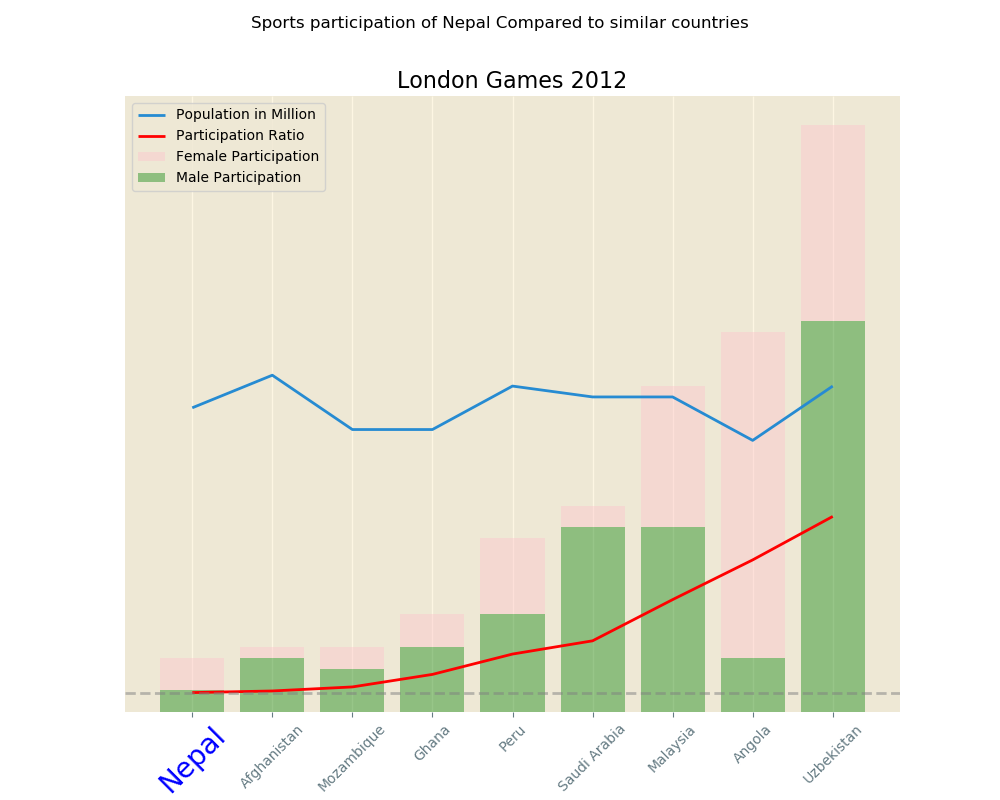

In [215]:
finaldata['Participation Ratio']=(finaldata.Male+finaldata.Female)/finaldata.Population*10

ratio=finaldata.where(finaldata['Country']=='Nepal').dropna().ratio
ratio=float(ratio)
finaldata.sort_values(by='Participation Ratio',inplace=True)
finaldata.reset_index(drop=True,inplace=True)

import seaborn as sns
plt.tight_layout()
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,8))
popplot=plt.plot(finaldata.index,finaldata['Population'],label='Population in Million')
plt.plot(finaldata.index,finaldata['Participation Ratio'],color='red')
plt.bar(finaldata.index,finaldata['Female'],bottom=finaldata['Male'],label='Female Participation',color=['pink'],alpha=0.4)
plt.bar(finaldata.index,finaldata['Male'],label='Male Participation',tick_label =finaldata['Country'],color=['green'],alpha=0.4)
plt.legend()
plt.axhline(y = ratio, color = 'grey',linestyle='--', alpha = 0.5)
plt.gca().get_xticklabels()[0].set_color("Blue")
plt.gca().get_xticklabels()[0].set_size(20)
plt.yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)
plt.title('London Games 2012')
plt.suptitle('Sports participation of Nepal Compared to similar countries')
 
plt.gcf().savefig('plot_Nepal_Others_Sports.jpeg')